# Titanic Dataset end to end project by lakshay jain

## importing all neccessary libraries

In [508]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data loading

In [678]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### 1.1 Data overview

#### Data Dictionary
| Variable           | Definition                          | Key                                |
|--------------------|-------------------------------------|-------------------------------------|
| Survival| `Survival`| `0 = No, 1 = Yes`|
| pclass| `Ticket class`|`1 = 1st, 2 = 2nd, 3 = 3rd`|
| sex| `Sex`||
| Age| `Age in years`||
|sibsp| `# of siblings / spouses aboard the Titanic`||
|parch|`# of parents / children aboard the Titanic	`||
|ticket|`Ticket number`||
|fare|`Passenger Fare`||
|cabin|`Cabin number`||
|embarked|`Port of Embarkation`|`C = Cherbourg, Q = Queenstown, S = Southampton`|

In [394]:
display(train.sample(5))
display(test.sample(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.000,F33,S
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.050,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.250,NaN,S
767,768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.750,NaN,Q
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
401,1293,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.0000,NaN,S
211,1103,3,"Finoli, Mr. Luigi",male,NaN,0,0,SOTON/O.Q. 3101308,7.0500,NaN,S
230,1122,2,"Sweet, Mr. George Frederick",male,14.0,0,0,220845,65.0000,NaN,S
169,1061,3,"Hellstrom, Miss. Hilda Maria",female,22.0,0,0,7548,8.9625,NaN,S


## 2. Initial Profiling

### 2.1 shapes

In [395]:
print("train dataset:- ","no. of records:-",train.shape[0],"; no. of features:-",train.shape[1])
print("test dataset:- ","no. of records:-",test.shape[0],"; no. of features:-",test.shape[1])

train dataset:-  no. of records:- 891 ; no. of features:- 12
test dataset:-  no. of records:- 418 ; no. of features:- 11


### 2.2 types

In [396]:
print("         types")
print("----------------------")
display(train.dtypes)

         types
----------------------


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Name, Sex ,Ticket, Cabin , Embarked are not numerical

### 2.3 missing values

In [397]:
print("train...........")
print(train.isnull().sum())
print("test...........")
print(test.isnull().sum())

train...........
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
test...........
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [398]:
missing_age_pct = train['Age'].isnull().mean() * 100
print(f"percentage of age missing: {missing_age_pct}%")
missing_cabin_pct = train['Cabin'].isnull().mean() * 100
print(f"percentage of Cabins missing: {missing_cabin_pct}%")


percentage of age missing: 19.865319865319865%
percentage of Cabins missing: 77.10437710437711%


#### Survived has missing values because that is the testing set , Age and Cabin has the highest missing values (will look into that)

<Axes: >

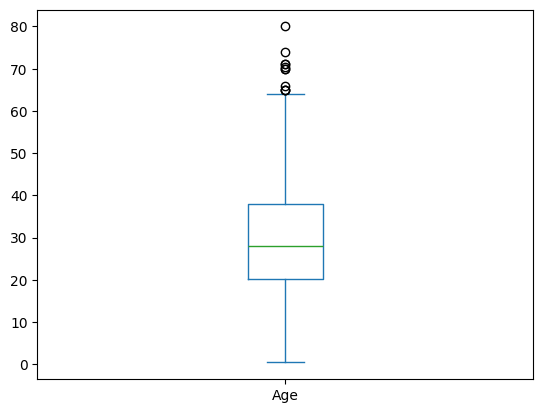

In [399]:
train["Age"].plot.box()

#### AS WE CAN SEE :- there are outliers in Age therefore we have to use median instead of mean to impute for missing values

In [400]:
print("median:- ",train["Age"].median())
print("mean:- ",train["Age"].mean())

median:-  28.0
mean:-  29.69911764705882


In [679]:
train['Age'] = train["Age"].fillna(train["Age"].median())
test['Age'] = test["Age"].fillna(train["Age"].median())


#### we will be using mode for embarked as it is a categorical column

In [402]:
display(train[train['Embarked'].isnull()])
display(test[test['Embarked'].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [403]:
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [680]:
Embarked_mode = str(train["Embarked"].mode()[0])
train["Embarked"] = train['Embarked'].fillna(Embarked_mode)

<Axes: >

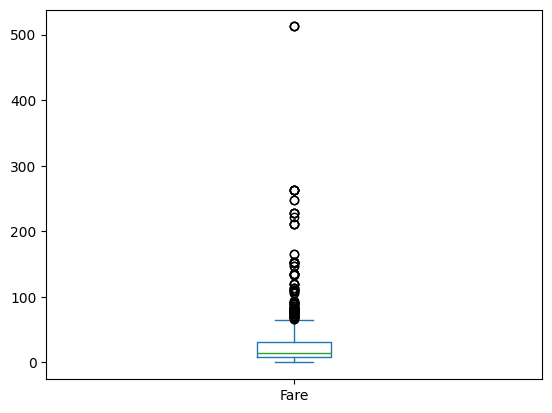

In [405]:
train['Fare'].plot.box()

#### we'll use median for fare because of outlier

In [406]:
print("fare median:-",train['Fare'].median())
print("fare mean:-",train['Fare'].mean())

fare median:- 14.4542
fare mean:- 32.204207968574636


In [407]:
display(train[train['Fare'].isnull()])
display(test[test['Fare'].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [681]:
test['Fare'] = test['Fare'].fillna(train["Fare"].median())
test['Fare'].isnull().sum()

np.int64(0)

In [409]:
display(test.sample())
display(train.sample())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
235,1127,3,"Vendel, Mr. Olof Edvin",male,20.0,0,0,350416,7.8542,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
236,237,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0,NaN,S


#### we will encode the cabin later

### 2.4 check for duplicates

In [682]:
train_test = [train,test]
for dataset in train_test:
    display(dataset.duplicated().sum())

np.int64(0)

np.int64(0)

#### therefore no record is duplicate

#### 2.5 check for skewness

In [411]:
train['Fare'].skew()

np.float64(4.787316519674893)

<Axes: xlabel='Fare', ylabel='Density'>

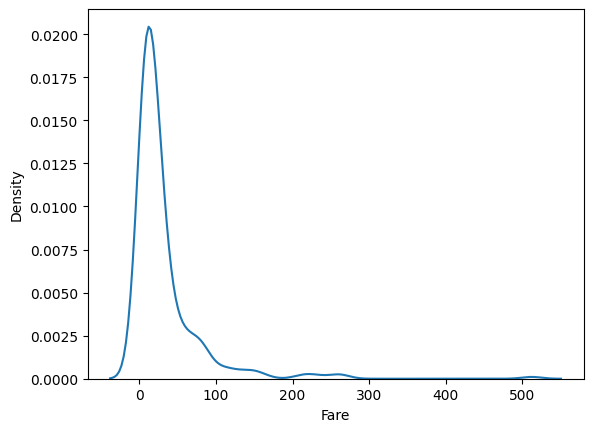

In [412]:
sns.kdeplot(train['Fare'])

#### using log transformation on fare to reduce skewness

In [683]:
for dataset in train_test:
    dataset['Fare'] = np.log1p(train["Fare"])
    print(dataset['Fare'].skew())

0.3949280095189306
-1.412387230608748


In [414]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,2.442347,F33,S


In [684]:
train_noid = train.drop('PassengerId',axis=1)
test_noid = test.drop('PassengerId',axis=1)


In [416]:
train_noid['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

### 3. Lets start with EDA

In [417]:
train_noid.select_dtypes(include='number').corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.329862
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.661022
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.110964
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.318528
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.332186
Fare,0.329862,-0.661022,0.110964,0.318528,0.332186,1.000000


#### 3.1 univariate analysis

0.42


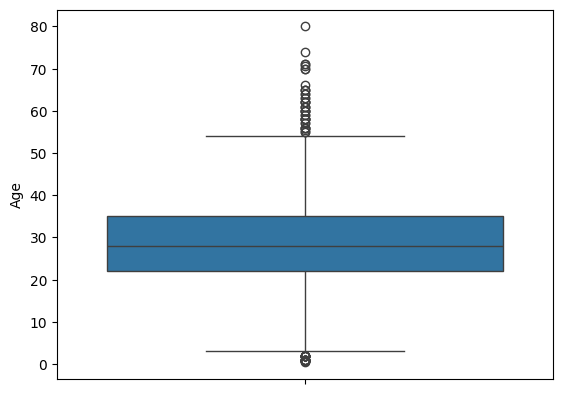

In [418]:
sns.boxplot(train_noid['Age'])
print(train_noid['Age'].min())

#### we will convert age to bins , because there are too many outliers

<Axes: xlabel='Sex', ylabel='count'>

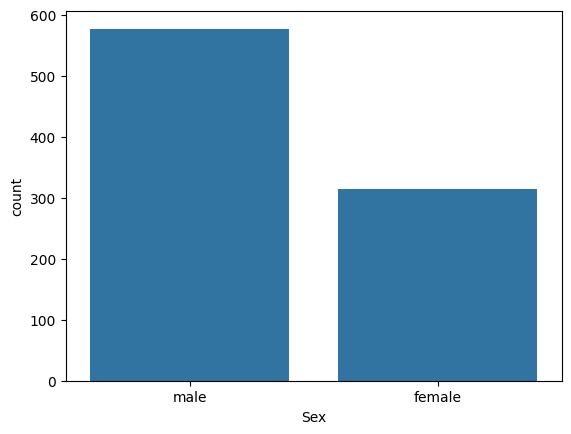

In [419]:
sns.barplot(train_noid['Sex'].value_counts())

<Axes: xlabel='Embarked', ylabel='count'>

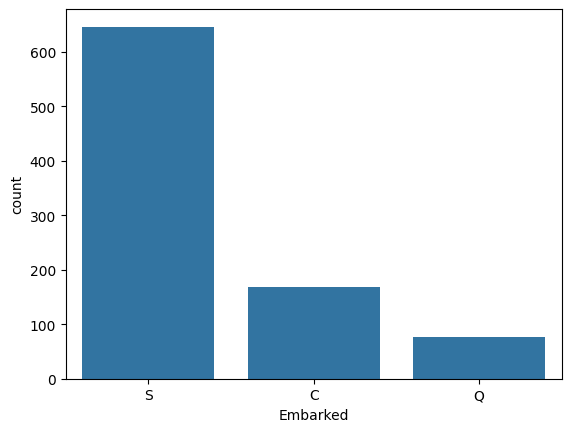

In [420]:
sns.barplot(train_noid['Embarked'].value_counts())

<Axes: xlabel='Pclass', ylabel='count'>

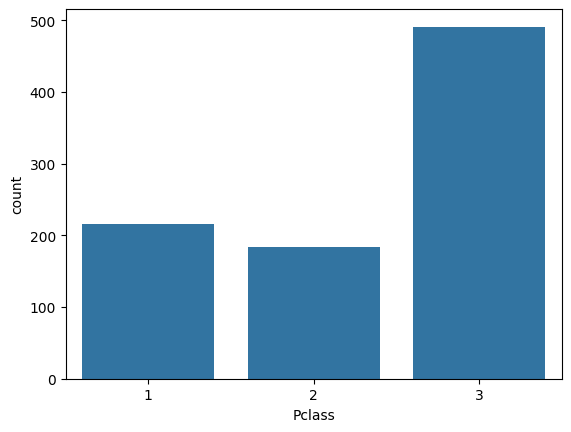

In [421]:
sns.barplot(train_noid['Pclass'].value_counts())

<Axes: xlabel='Fare', ylabel='Density'>

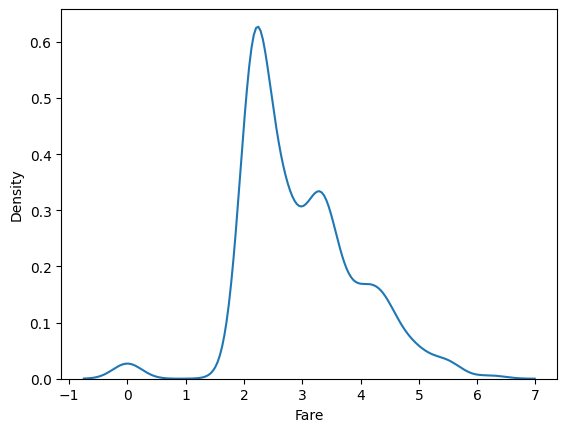

In [422]:
sns.kdeplot(train_noid['Fare'])

#### 3.2 bivariate analysis

<Axes: >

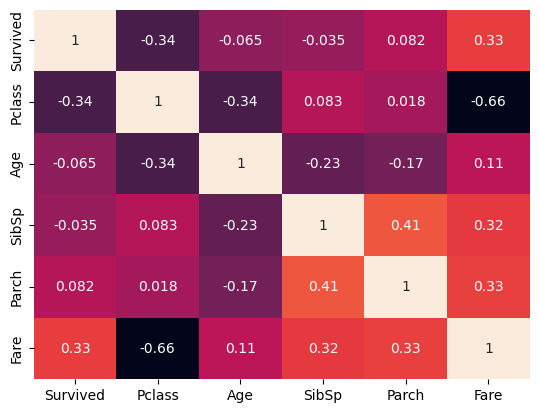

In [423]:
sns.heatmap(
    train_noid.select_dtypes(include='number').corr(),
    annot=True,            # Display numbers in each cell
    fmt=".2g",             # Format with 2 significant digits
    cbar=False             # Remove the color bar (heat strip)
)

<Axes: xlabel='Embarked', ylabel='Survived'>

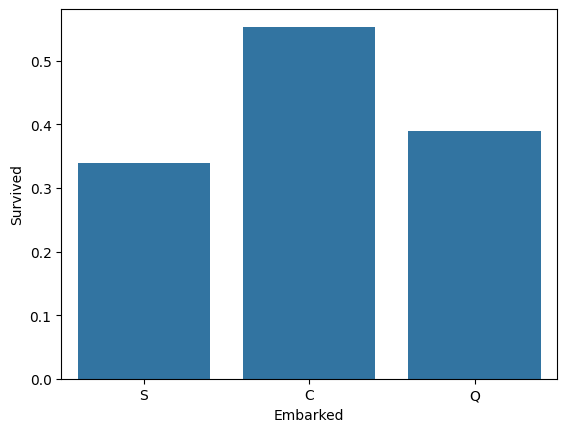

In [424]:
sns.barplot(x='Embarked', y='Survived', data=train_noid,errorbar=None)


<Axes: xlabel='Pclass', ylabel='Survived'>

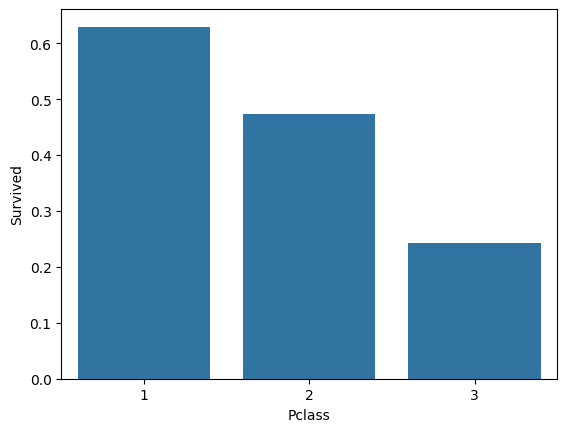

In [425]:
sns.barplot(x=train_noid['Pclass'],y=train_noid['Survived'],errorbar=None)

<Axes: xlabel='Sex', ylabel='Survived'>

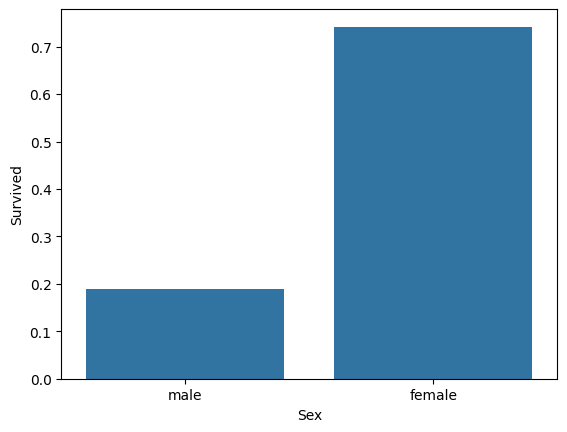

In [426]:
sns.barplot(x=train_noid['Sex'],y=train_noid['Survived'],errorbar=None)

In [427]:
train_noid.sample()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
48,0,3,"Samaan, Mr. Youssef",male,28.0,2,0,2662,3.121448,NaN,C


<Axes: xlabel='Survived', ylabel='Fare'>

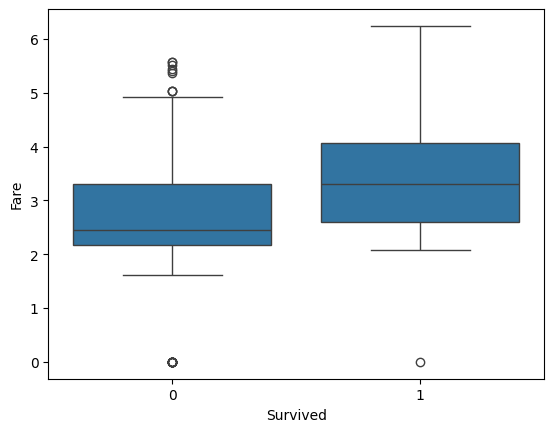

In [428]:
sns.boxplot(x='Survived', y='Fare', data=train_noid)


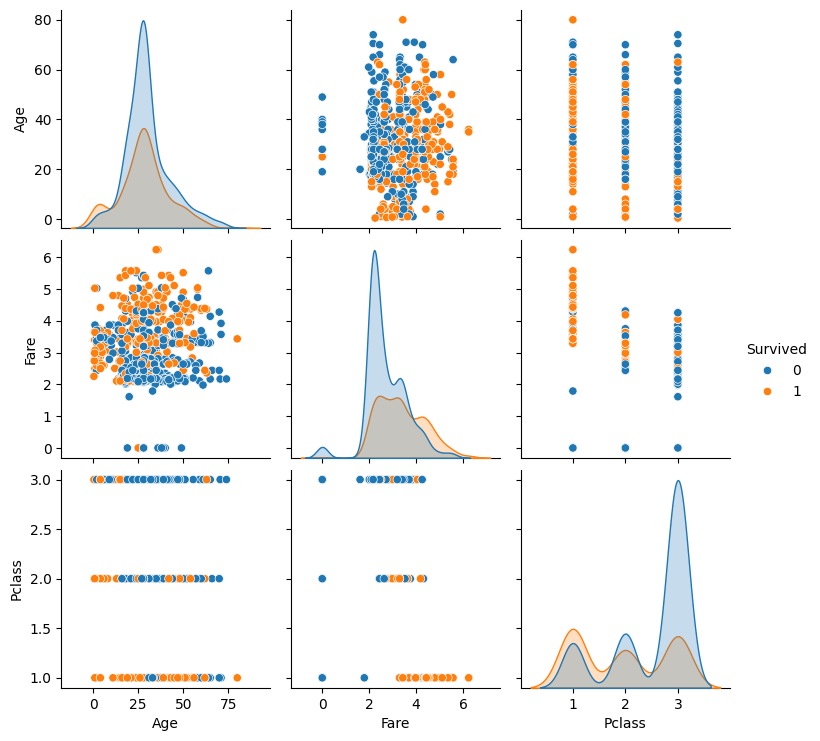

In [429]:
sns.pairplot(train_noid[["Age", "Fare", "Pclass", "Survived"]], hue="Survived")


In [430]:
train_noid.sample()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,2.639057,NaN,S


# feature engineering

In [685]:
# binning the ages
train_test_noid = [train_noid,test_noid]
for dataset in train_test_noid:
    dataset['age_group'] = pd.cut(
        train_noid['Age'],
        bins=[0, 3, 12, 17, 25, 40, 59, dataset['Age'].max()],
        labels=['Infant', 'Child', 'Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'],
        include_lowest=True
    )

In [686]:
#HasCabin if has any cabin-> 1 else 0
train_noid['HasCabin'] = train_noid['Cabin'].notnull().astype(int)
test_noid['HasCabin'] =test_noid['Cabin'].notnull().astype(int)

In [433]:
train_noid.select_dtypes(include="number").corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.329862
HasCabin    0.316912
Name: Survived, dtype: float64

In [687]:
# dropping cabin as we now have hascabin
train_noid = train_noid.drop("Cabin",axis=1)
test_noid = test_noid.drop("Cabin",axis=1)

In [519]:
display(train_noid.sample())
display(test_noid.sample())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group,HasCabin
343,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,2.639057,S,Young Adult,0


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group,HasCabin
151,3,"Matinoff, Mr. Nicola",male,28.0,0,0,349255,1.651272,C,Young Adult,0


<Axes: xlabel='age_group', ylabel='Survived'>

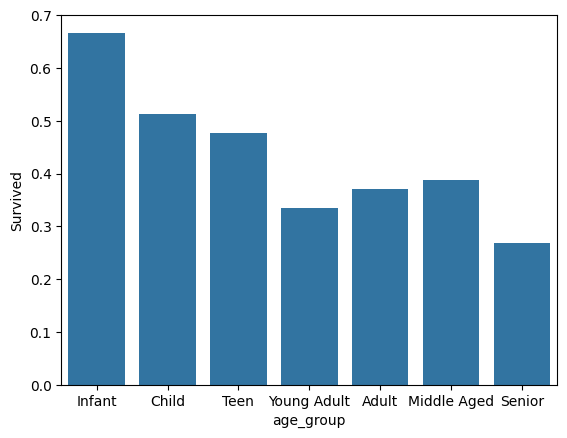

In [436]:
sns.barplot(x=train_noid['age_group'],y=train_noid['Survived'],errorbar=None)

In [688]:
#label encoding ages
ages_mapping = {"Infant": 1, "Child": 2, "Teen":3,"Young Adult":4,"Adult": 5, "Middle Aged":6,"Senior":7}
train_noid['age_group'] = train_noid['age_group'].map(ages_mapping)
test_noid['age_group'] = test_noid['age_group'].map(ages_mapping)

In [689]:
#dropping age as we have age binnings now
train_noid = train_noid.drop("Age",axis=1)
test_noid = test_noid.drop("Age",axis=1)

In [690]:
#encoding the gender
gender_mappings = {"female":1,"male":0}
train_noid['Sex'] = train_noid["Sex"].map(gender_mappings)
test_noid['Sex'] = test_noid["Sex"].map(gender_mappings)

In [691]:
#one_hot embarked encodings , and only using two categories as two are enough to represent 3
one_hot_embarked_train=pd.get_dummies(train_noid['Embarked'], prefix='Embarked',drop_first=True).astype(int)
train_noid=pd.concat([train_noid,one_hot_embarked_train],axis=1)

one_hot_embarked_test=pd.get_dummies(test_noid['Embarked'], prefix='Embarked',drop_first=True).astype(int)
test_noid = pd.concat([test_noid,one_hot_embarked_test],axis=1)

train_noid = train_noid.drop('Embarked',axis=1)
test_noid = test_noid.drop('Embarked',axis=1)

In [692]:
# dropping ticket for now 
train_noid = train_noid.drop('Ticket',axis=1)
test_noid = test_noid.drop('Ticket',axis=1)

In [693]:
train_noid['family_size'] = train_noid['SibSp'] + train_noid['Parch'] + 1  # one is for themselfs
test_noid['family_size'] = test_noid['SibSp'] + test_noid['Parch'] + 1 # one is for themselfs

In [694]:
def retreive(row):
    return row.split(",")[1].split(".")[0].strip()

train_noid['Name'] = train_noid['Name'].apply(func=retreive)
test_noid['Name'] = test_noid['Name'].apply(func=retreive)


In [695]:

#name mappings
title_map = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Ms': 'Miss',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Dr': 'Other',
    'Rev': 'Other',
    'Col': 'Other',
    'Major': 'Other',
    'Capt': 'Other',
    'Don': 'Other',
    'Lady': 'Other',
    'Sir': 'Other',
    'Jonkheer': 'Other',
    'Countess': 'Other',
    'the Countess': 'Other'
}
train_noid['Name'] = train_noid['Name'].map(title_map).fillna('Other')
test_noid['Name'] = test_noid['Name'].map(title_map).fillna('Other')

<Axes: xlabel='Name', ylabel='Survived'>

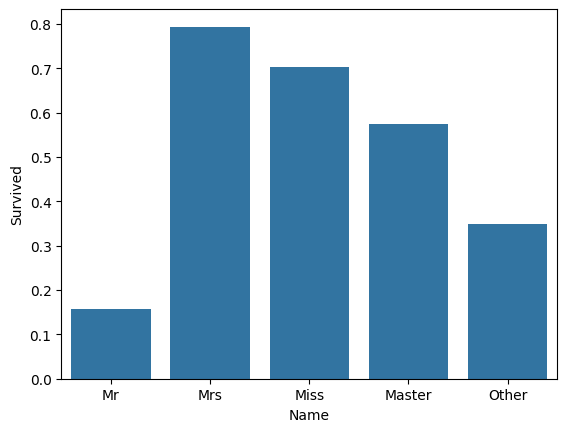

In [530]:
sns.barplot(x=train_noid['Name'],y=train_noid['Survived'],errorbar=None)

In [696]:
#one hot encoding of Name

one_hot_name_train=pd.get_dummies(train_noid['Name'], prefix='Title', drop_first=True)
train_noid = pd.concat([train_noid,one_hot_name_train],axis=1)
one_hot_name_test =pd.get_dummies(test_noid['Name'], prefix='Title', drop_first=True)
test_noid = pd.concat([test_noid,one_hot_name_test],axis=1)

train_noid = train_noid.drop("Name",axis=1)
test_noid = test_noid.drop("Name",axis=1)

In [697]:
train_noid[["Title_Miss","Title_Mr","Title_Mrs","Title_Other"]] = train_noid[["Title_Miss","Title_Mr","Title_Mrs","Title_Other"]].astype(int)

In [723]:
test_noid[["Title_Miss","Title_Mr","Title_Mrs","Title_Other"]] = test_noid[["Title_Miss","Title_Mr","Title_Mrs","Title_Other"]].astype(int)

In [533]:
train_noid.sample(100)

,Survived,Pclass,Sex,SibSp,Parch,Fare,age_group,HasCabin,Embarked_Q,Embarked_S,family_size,Title_Miss,Title_Mr,Title_Mrs,Title_Other
397,0,2,0,0,0,3.295837,6,0,0,1,1,0,1,0,0
595,0,3,0,1,1,3.224858,5,0,0,1,3,0,1,0,0
645,1,1,0,1,0,4.353231,6,1,0,0,2,0,1,0,0
434,0,1,0,1,0,4.041295,6,1,0,1,2,0,1,0,0
776,0,3,0,0,0,2.169054,5,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0,3,1,3,1,3.094446,1,0,0,1,5,1,0,0,0
152,0,3,0,0,0,2.202765,6,0,0,1,1,0,1,0,0
829,1,1,1,0,0,4.394449,7,1,0,1,1,0,0,1,0
407,1,2,0,1,1,2.983153,1,0,0,1,3,0,0,0,0


In [535]:
train_noid.corr()

,Survived,Pclass,Sex,SibSp,Parch,Fare,age_group,HasCabin,Embarked_Q,Embarked_S,family_size,Title_Miss,Title_Mr,Title_Mrs,Title_Other
Survived,1.000000,-0.338481,0.543351,-0.035322,0.081629,0.329862,-0.102673,0.316912,0.003650,-0.149683,0.016639,0.335636,-0.549199,0.341994,-0.012054
Pclass,-0.338481,1.000000,-0.131900,0.083081,0.018443,-0.661022,-0.247267,-0.725541,0.221009,0.074053,0.065997,-0.010261,0.142698,-0.153758,-0.187174
Sex,0.543351,-0.131900,1.000000,0.114631,0.245489,0.263276,-0.097878,0.140391,0.074115,-0.119224,0.200988,0.693916,-0.867334,0.550146,-0.075638
SibSp,-0.035322,0.083081,0.114631,1.000000,0.414838,0.318528,-0.291142,-0.040460,-0.026354,0.068734,0.890712,0.083462,-0.250489,0.061668,-0.025874
Parch,0.081629,0.018443,0.245489,0.414838,1.000000,0.332186,-0.274284,0.036987,-0.081228,0.060814,0.783111,0.100998,-0.333905,0.223575,-0.059535
Fare,0.329862,-0.661022,0.263276,0.318528,0.332186,1.000000,0.016475,0.557192,-0.160456,-0.128846,0.383658,0.115668,-0.306288,0.217721,0.056443
age_group,-0.102673,-0.247267,-0.097878,-0.291142,-0.274284,0.016475,1.000000,0.150987,0.033534,-0.030571,-0.336013,-0.259365,0.263173,0.159351,0.144968
HasCabin,0.316912,-0.725541,0.140391,-0.040460,0.036987,0.557192,0.150987,1.000000,-0.129572,-0.101139,-0.009175,0.043749,-0.137319,0.123817,0.079742
Embarked_Q,0.003650,0.221009,0.074115,-0.026354,-0.081228,-0.160456,0.033534,-0.129572,1.000000,-0.499421,-0.058592,0.167531,-0.078338,-0.090432,0.000311
Embarked_S,-0.149683,0.074053,-0.119224,0.068734,0.060814,-0.128846,-0.030571,-0.101139,-0.499421,1.000000,0.077359,-0.137144,0.112870,-0.002550,-0.026561


In [698]:
train_noid['age_group'] = train_noid['age_group'].cat.codes

In [699]:
def family_category(size):
    if size == 1:
        return 'Alone'
    elif size <= 4:
        return 'Small'
    else:
        return 'Large'

train_noid['family_size'] = train_noid['family_size'].apply(family_category)


In [700]:
test_noid['family_size'] = test_noid['family_size'].apply(family_category)

In [701]:
train_noid = pd.concat([train_noid,pd.get_dummies(train_noid, columns=['family_size'], drop_first=True)],axis=1)
test_noid = pd.concat([test_noid,pd.get_dummies(test_noid, columns=['family_size'], drop_first=True)],axis=1)

In [702]:
train_noid[['family_size_Large','family_size_Small']] = train_noid[['family_size_Large','family_size_Small']].astype(int)
test_noid[['family_size_Large','family_size_Small']] = test_noid[['family_size_Large','family_size_Small']].astype(int)

In [703]:
train_noid = train_noid.drop('family_size',axis=1)
test_noid = test_noid.drop('family_size',axis=1)

In [557]:
train_noid.sample()

,Survived,Pclass,Sex,SibSp,Parch,Fare,age_group,HasCabin,Embarked_Q,Embarked_S,...,age_group,HasCabin,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,family_size_Large,family_size_Small
409,0,3,1,3,1,3.275887,4,0,0,1,...,4,0,0,1,1,0,0,0,1,0


In [704]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols=["Fare","Parch","SibSp"]
scaler.fit(train_noid[num_cols])

train_noid[num_cols] = scaler.transform(train_noid[num_cols])
test_noid[num_cols] = scaler.transform(test_noid[num_cols])

In [ ]:
# train_noid=train_noid.drop_duplicates()

In [705]:
train_noid = train_noid.loc[:, ~train_noid.columns.duplicated()]
train_noid

,Survived,Pclass,Sex,SibSp,Parch,Fare,age_group,HasCabin,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,family_size_Large,family_size_Small
0,0,3,0,0.432793,-0.473674,-0.879741,3,0,0,1,0,1,0,0,0,1
1,1,1,1,0.432793,-0.473674,1.361220,4,1,0,0,0,0,1,0,0,1
2,1,3,1,-0.474545,-0.473674,-0.798540,4,0,0,1,1,0,0,0,0,0
3,1,1,1,0.432793,-0.473674,1.062038,4,1,0,1,0,0,1,0,0,1
4,0,3,0,-0.474545,-0.473674,-0.784179,4,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,-0.474545,-0.473674,-0.333698,4,0,0,1,0,0,0,1,0,0
887,1,1,1,-0.474545,-0.473674,0.487082,3,1,0,1,1,0,0,0,0,0
888,0,3,1,0.432793,2.008933,0.242007,4,0,0,1,1,0,0,0,0,1
889,1,1,0,-0.474545,-0.473674,0.487082,4,1,0,0,0,1,0,0,0,0


In [706]:
train_noid.sample()

,Survived,Pclass,Sex,SibSp,Parch,Fare,age_group,HasCabin,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,family_size_Large,family_size_Small
794,0,3,0,-0.474545,-0.473674,-0.801924,3,0,0,1,0,1,0,0,0,0


In [707]:
X = train_noid.drop('Survived',axis=1)
Y = train_noid['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<Axes: >

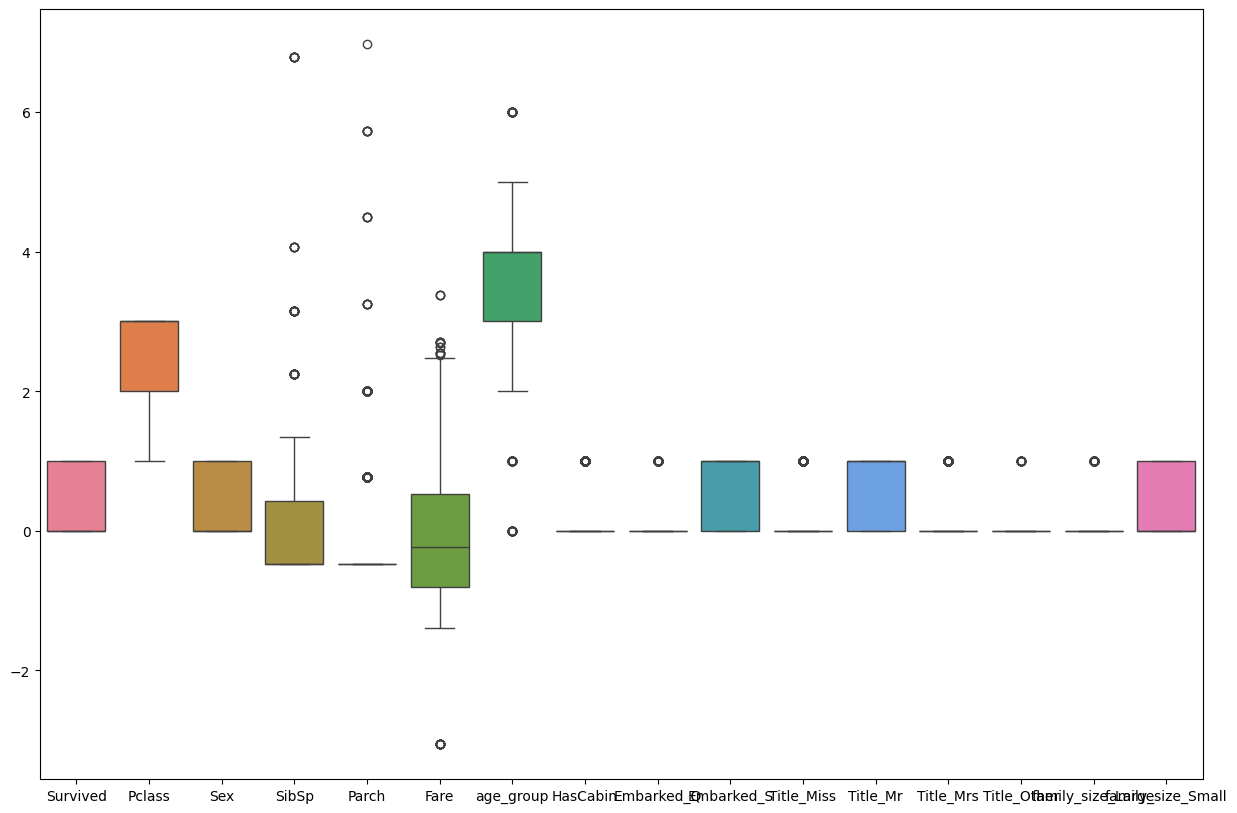

In [708]:
plt.figure(figsize=(15,10))
sns.boxplot(train_noid)

In [714]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(max_depth=10,max_features='sqrt',min_samples_leaf=4,min_samples_split=10,n_estimators=200),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name}: {accuracy_score(y_test, preds):.4f}")

Logistic Regression: 0.8101
Random Forest: 0.8268
SVM: 0.8156
Naive Bayes: 0.7765
KNN: 0.8268
XGBoost: 0.8101


In [ ]:

from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # number of trees
    'max_depth': [None, 10, 20, 30],  # max depth of trees
    'min_samples_split': [2, 5, 10],  # min samples to split
    'min_samples_leaf': [1, 2, 4],  # min samples at leaf node
    'max_features': ['sqrt', 'log2']  # change 'auto' to 'sqrt' or 'log2'
}

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Print the best parameters
print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Evaluate on test data
print("Random Forest Accuracy on Test Data:", best_rf_model.score(X_test, y_test))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Accuracy on Test Data: 0.8324022346368715


In [721]:
model = RandomForestClassifier(max_depth=10,max_features='sqrt',min_samples_leaf=4,min_samples_split=10,n_estimators=200)

model.fit(X,Y)
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
y_pred=model.predict(test_noid)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,1.134691,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,1.664038,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,1.159662,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,1.607603,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,1.164014,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,0.000000,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,1.159662,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,1.164014,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,1.506640,NaN,S


In [728]:
display(y_pred)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
final_ans= pd.concat([test['PassengerId'],pd.Series(y_pred)],axis=1)
final_ans= final_ans.rename(columns={0:"Survived"})

In [743]:
final_ans.to_csv("myans.csv", index=False)

In [726]:
test_noid

,Pclass,Sex,SibSp,Parch,Fare,age_group,HasCabin,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,family_size_Large,family_size_Small
0,3,0,-0.474545,-0.473674,-1.886986,4,0,1,0,0,0,1,1,0,0
1,3,1,0.432793,-0.473674,-1.340425,5,0,0,1,0,0,0,0,0,1
2,2,0,-0.474545,-0.473674,-1.861203,5,0,1,0,0,0,1,1,0,0
3,3,0,-0.474545,-0.473674,-1.398696,5,0,0,1,0,0,1,1,0,0
4,3,1,0.432793,0.767630,-1.856710,5,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,-0.474545,-0.473674,-3.058578,5,0,0,1,0,0,1,1,0,0
414,1,1,-0.474545,-0.473674,-1.861203,6,1,0,0,0,0,0,0,0,0
415,3,0,-0.474545,-0.473674,-1.856710,5,0,0,1,0,0,1,1,0,0
416,3,0,-0.474545,-0.473674,-1.502942,5,0,0,1,0,0,1,1,0,0


In [725]:

test_noid = test_noid.loc[:, ~test_noid.columns.duplicated()]